In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D 
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import os
import keras
import shutil
from keras.preprocessing.image import ImageDataGenerator

In [14]:
from keras.preprocessing.image import ImageDataGenerator #Figure out all details
train_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2
)

test_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2
)
val_datagen = ImageDataGenerator(
    rescale=1./255, shear_range=0.2, zoom_range=0.2
)

In [15]:
training_set = train_datagen.flow_from_directory( #Flow from directory
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/train",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)
test_set = test_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/test",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)
val_set = val_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/val",
    target_size=(64,64),
    batch_size=32,
    class_mode="categorical"
)

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


# VGG modified

In [ ]:
#VGG-16 modified to 13 layers
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='VALID', input_shape=training_set.image_shape), 
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),#know conv2d and MaxPooling2D, using 0 padding, and stride is how you move across
    
    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),#Dimensionality reduction

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])


In [48]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 6, 6, 128)      

In [49]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')]) 
#root mean squared propagation

In [50]:
m1= model.fit(training_set, validation_data=val_set,batch_size=150,epochs=3)

Epoch 1/3
312/312 [==============================] - 139s 441ms/step - loss: 0.9886 - accuracy: 0.6057 - precision: 0.7054 - recall: 0.4664 - val_loss: 0.6517 - val_accuracy: 0.7279 - val_precision: 0.7739 - val_recall: 0.6916
Epoch 2/3
312/312 [==============================] - 135s 431ms/step - loss: 0.4437 - accuracy: 0.8327 - precision: 0.8560 - recall: 0.8069 - val_loss: 0.1892 - val_accuracy: 0.9412 - val_precision: 0.9484 - val_recall: 0.9332
Epoch 3/3
312/312 [==============================] - 134s 430ms/step - loss: 0.1662 - accuracy: 0.9415 - precision: 0.9444 - recall: 0.9399 - val_loss: 0.0538 - val_accuracy: 0.9831 - val_precision: 0.9855 - val_recall: 0.9823


In [51]:
model.evaluate(test_set)

40/40 [==============================] - 13s 329ms/step - loss: 0.0628 - accuracy: 0.9808 - precision: 0.9815 - recall: 0.9792


[0.06283870339393616,
 0.9807846546173096,
 0.9815409183502197,
 0.9791833758354187]

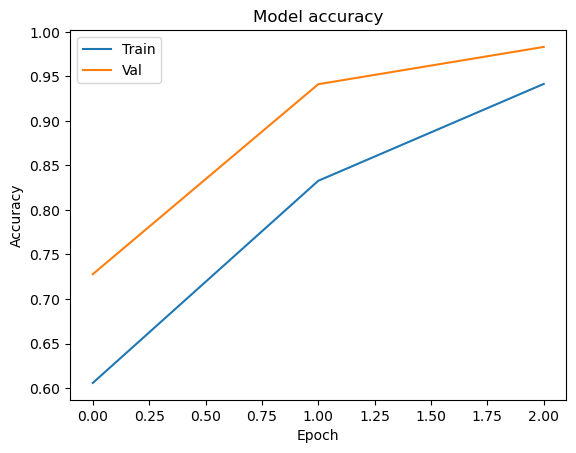

In [52]:
import matplotlib.pyplot as plt

plt.plot(m1.history['accuracy'])
plt.plot(m1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


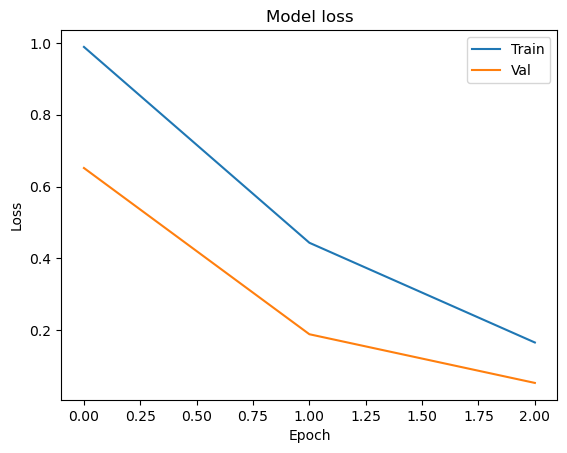

In [53]:
import matplotlib.pyplot as plt

plt.plot(m1.history['loss'])
plt.plot(m1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


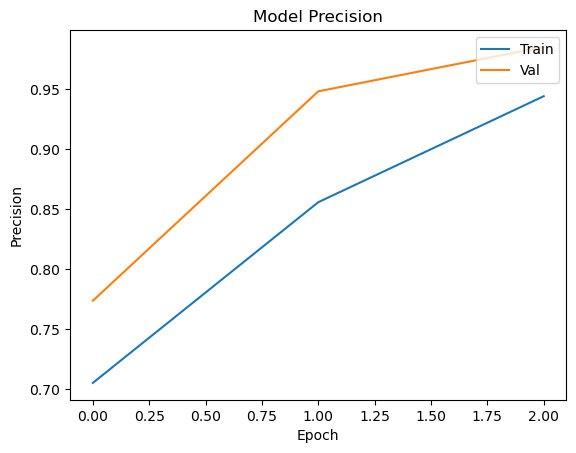

In [54]:
import matplotlib.pyplot as plt

plt.plot(m1.history['precision'])
plt.plot(m1.history['val_precision'])
plt.title('Model Precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


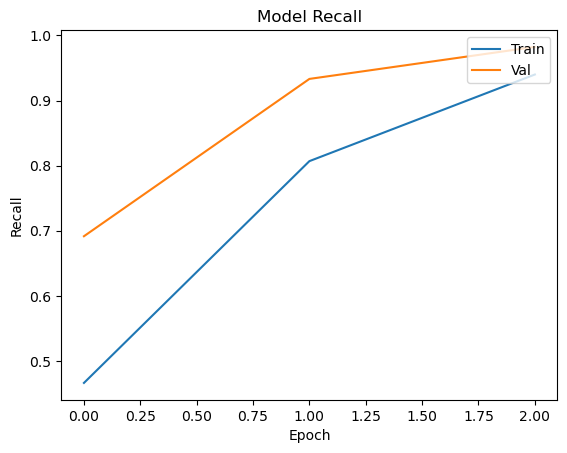

In [71]:
import matplotlib.pyplot as plt

plt.plot(m1.history['recall'])
plt.plot(m1.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# AlexNet

In [55]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.layers import concatenate

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model2 = Sequential()

# Layer 1
model2.add(Conv2D(32,(3,3), strides=(4,4), activation='relu', input_shape=(64,64,3)))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Layer 2
model2.add(Conv2D(64,(3,3), strides=(1,1), activation='relu', padding="same"))
model2.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))

# Layer 3
model2.add(Conv2D(128,(3,3), strides=(1,1), activation='relu', padding="same"))

# Layer 4
model2.add(Conv2D(256,(3,3), strides=(1,1), activation='relu', padding="same"))


# Layer 6
model2.add(Flatten())
model2.add(Dense(units=128, activation='relu'))
model2.add(Dropout(0.5))

# Layer 7
model2.add(Dense(units=64, activation='relu'))
model2.add(Dropout(0.5))

# Layer 8
model2.add(Dense(units=4, activation='softmax'))

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy',keras.metrics.Precision(name='precision'),keras.metrics.Recall(name='recall')])


In [64]:
m2=model2.fit(training_set, validation_data=val_set,batch_size=150,epochs=3)

Epoch 1/3
312/312 [==============================] - 115s 366ms/step - loss: 1.1185 - accuracy: 0.5707 - precision: 0.6906 - recall: 0.3276 - val_loss: 0.8426 - val_accuracy: 0.6812 - val_precision: 0.7591 - val_recall: 0.5886
Epoch 2/3
312/312 [==============================] - 122s 390ms/step - loss: 0.8435 - accuracy: 0.6807 - precision: 0.7692 - recall: 0.5709 - val_loss: 0.6949 - val_accuracy: 0.7085 - val_precision: 0.7830 - val_recall: 0.6216
Epoch 3/3
312/312 [==============================] - 116s 371ms/step - loss: 0.6684 - accuracy: 0.7404 - precision: 0.8083 - recall: 0.6564 - val_loss: 0.4885 - val_accuracy: 0.8180 - val_precision: 0.8803 - val_recall: 0.7576


In [65]:
model2.evaluate(test_set)

40/40 [==============================] - 12s 305ms/step - loss: 0.4870 - accuracy: 0.8127 - precision: 0.8714 - recall: 0.7486


[0.4870082139968872,
 0.8126501441001892,
 0.8713886141777039,
 0.7485988736152649]

In [70]:
model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 16, 16, 32)        896       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_77 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 3, 3, 128)         73856     
                                                                 
 conv2d_79 (Conv2D)          (None, 3, 3, 256)       

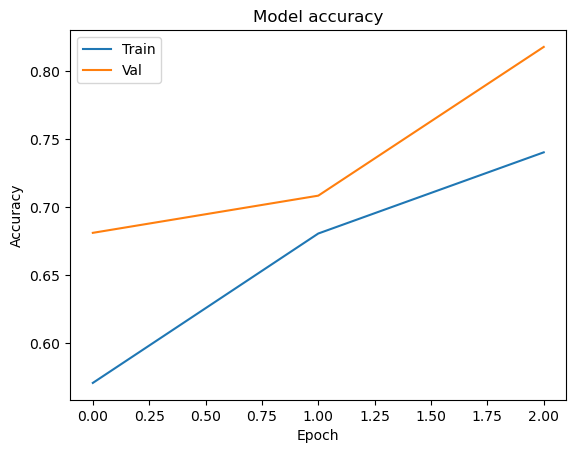

In [67]:
import matplotlib.pyplot as plt

plt.plot(m2.history['accuracy'])
plt.plot(m2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


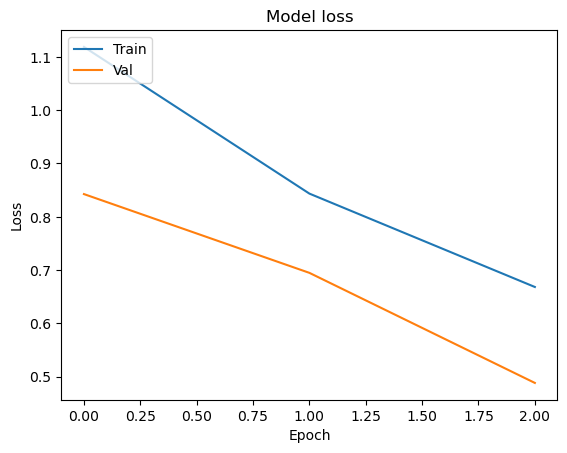

In [68]:
import matplotlib.pyplot as plt

plt.plot(m2.history['loss'])
plt.plot(m2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


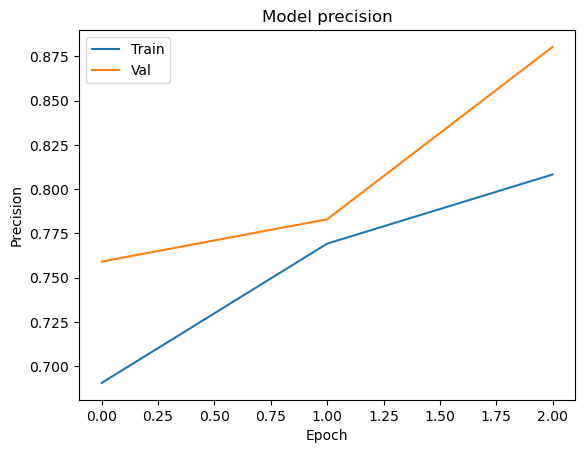

In [69]:
import matplotlib.pyplot as plt

plt.plot(m2.history['precision'])
plt.plot(m2.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


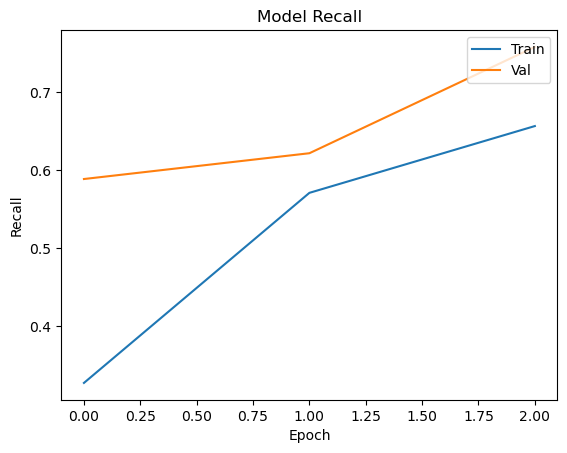

In [72]:
import matplotlib.pyplot as plt

plt.plot(m2.history['recall'])
plt.plot(m2.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


# Original VGG-16 Structure

In [81]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

model3 = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [80]:
training_set1 = train_datagen.flow_from_directory( #Flow from directory
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)
test_set1 = test_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/test",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)
val_set1 = val_datagen.flow_from_directory(
    "/kaggle/input/kindey-stone-dataset-splitted/Kindey_Stone_Dataset/val",
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 9955 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.


In [ ]:
m3=model3.fit(training_set1, validation_data=val_set1,batch_size=150,epochs=3)

Epoch 1/3
  1/312 [..............................] - ETA: 2:59:49 - loss: 1.3860 - accuracy: 0.3750

In [ ]:
model3.evaluate(test_set)

In [ ]:
model3.summary()

In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['accuracy'])
plt.plot(m3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['loss'])
plt.plot(m3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['precision'])
plt.plot(m3.history['val_precision'])
plt.title('Model precision')
plt.ylabel('Precision')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.plot(m3.history['recall'])
plt.plot(m3.history['val_recall'])
plt.title('Model Recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
